In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
train_ori_df = pd.read_csv('../input/train.csv')
test_ori_df = pd.read_csv('../input/test.csv')

print(train_ori_df.shape)
print(test_ori_df.shape)

(1460, 81)
(1459, 80)


<font size=5>
**0. Description**
</font>

&emsp;&emsp;Before starting my job, I'll get an initial impression from dataset.

In [3]:
train_ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train_ori_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


&emsp;&emsp;Let's figure out  category and numeric variables.

In [5]:
object_var = train_ori_df.dtypes[train_ori_df.dtypes == 'object'].index
numeric_var = train_ori_df.dtypes[train_ori_df.dtypes != 'object'].index
print('Category VAriables:')
print(list(object_var))
print('-'*30)
print('Numeric Variables:')
print(list(numeric_var))

Category VAriables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
------------------------------
Numeric Variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Ga

Text(0,0.5,'SalePrice')

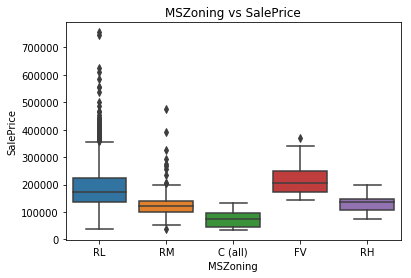

In [6]:
sns.boxplot(x='MSZoning',y='SalePrice',data=train_ori_df)
plt.title('MSZoning vs SalePrice')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')

<font size=5>**1. Data Preprocessing**</font>

<font size=4>1.1 Deal with missing values</font>

In [7]:
print('There are {} columns with missing values.'.format(len(train_ori_df.isnull().sum()[lambda x:x!=0])))

There are 19 columns with missing values.


In [8]:
print('There are {} columns with missing values.'.format(len(test_ori_df.isnull().sum()[lambda x:x!=0])))

There are 33 columns with missing values.


As the output shows, there are 19 columns in trainset and 33 in testset  with missing values. What I want to do is:
           1. Find the common features, and fill in missing values together.
           2. Fill in their own missing values one after another.

In [9]:
#find common features
train_miss_fea_list = train_ori_df.isnull().sum()[lambda x:x!=0].index
test_miss_fea_list = test_ori_df.isnull().sum()[lambda x:x!=0].index
common_miss_fea_list = [ x for x in train_miss_fea_list if x in test_miss_fea_list ]

#find own features
train_own_na_list = [ x for x in train_miss_fea_list if x not in common_miss_fea_list ]
test_own_na_list = [ x for x in test_miss_fea_list if x not in common_miss_fea_list ]

print('There are {} columns which have missing values in both train and test'.format(
    len(common_miss_fea_list)))
print(common_miss_fea_list)
print('-'*50)
print('There are {} column(s) which only have missing values in train.'.format(len(train_own_na_list)))
print(train_own_na_list)
print('-'*50)
print('There are {} column(s) which only have missing values in test.'.format(len(test_own_na_list)))
print(test_own_na_list)

There are 18 columns which have missing values in both train and test
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
--------------------------------------------------
There are 1 column(s) which only have missing values in train.
['Electrical']
--------------------------------------------------
There are 15 column(s) which only have missing values in test.
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


Thanks to [Serigne][1]. I learned a lot from his wonderful job. And I improved some of my methods.
[1]:https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [10]:
#fillna for common features
datasets = [train_ori_df,test_ori_df]

for i in range(len(datasets)):
    dataset = datasets[i]
    
    dataset['LotFrontage'] = dataset.groupby("Neighborhood")['LotFrontage'].transform(
        lambda x:x.fillna(x.median()))
    dataset['MasVnrType'] = dataset.groupby("Neighborhood")['MasVnrType'].transform(
        lambda x:x.fillna(x.mode()[0]))
        
    for feat in ['MasVnrArea','GarageYrBlt']:
        dataset[feat] = dataset[feat].fillna(0)
    
    collist = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
               'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
    for feat in collist:
        dataset[feat] = dataset[feat].fillna('None')
        
    datasets[i] = dataset
    
train_fillna_df,test_fillna_df = datasets[0],datasets[1]

In [11]:
#deal with train own
train_fillna_df['Electrical'] = train_fillna_df.groupby("Neighborhood")['Electrical'].transform(
    lambda x:x.fillna(x.mode()[0]))

In [12]:
#deal with test own
test_fillna_df['BsmtFinSF1'] = test_fillna_df.groupby('BsmtFinType1')['BsmtFinSF1'].transform(
    lambda x:x.fillna(x.median()))
test_fillna_df['BsmtFinSF2'] = test_fillna_df.groupby('BsmtFinType2')['BsmtFinSF2'].transform(
    lambda x:x.fillna(x.median()))
test_fillna_df['MSZoning'] = test_fillna_df.groupby("Neighborhood")['MSZoning'].transform(
    lambda x:x.fillna(x.mode()[0]))
test_fillna_df['Utilities'] = test_fillna_df['Utilities'].fillna('AllPub')
test_fillna_df['Exterior1st'] = test_fillna_df.groupby("Neighborhood")['Exterior1st'].transform(
    lambda x:x.fillna(x.mode()[0]))
test_fillna_df['Exterior2nd'] = test_fillna_df.groupby("Exterior1st")['Exterior2nd'].transform(
    lambda x:x.fillna(x.mode()[0]))

for feat in ['BsmtHalfBath','KitchenQual','Functional','SaleType']:
    test_fillna_df[feat] = test_fillna_df[feat].fillna(test_fillna_df[feat].mode()[0])
for feat in ['BsmtUnfSF','BsmtFullBath','TotalBsmtSF']:
    test_fillna_df[feat] = test_fillna_df[feat].fillna(test_fillna_df[feat].median())
for feat in ['GarageArea','GarageCars']:
    test_fillna_df[feat] = test_fillna_df[feat].fillna(0)

In [13]:
print('Trainset missing value: %d'%train_fillna_df.isnull().sum().sum())
print('Testset missing value: %d'%test_fillna_df.isnull().sum().sum())

Trainset missing value: 0
Testset missing value: 0


<font size=4>1.2 Drop Outliers</font>

&emsp;&emsp;At first, I didn't do this job because there are 80 features, I have no idea how to define the outliers and I also think this is unnecessary for this work. However, I found that lots of people figure out the points below. And obviously they are right!

&emsp;&emsp;For more imformation, you can read the document [*AmesHousing.txt*][1]
[1]:http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt

Text(0.5,0,'GrLivArea')

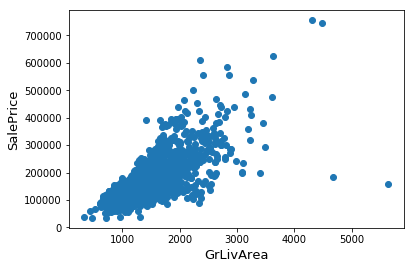

In [14]:
plt.scatter(x = train_fillna_df['GrLivArea'], y = train_fillna_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

&emsp;&emsp;Yep! Quite clearly! There are two outliers that are of a low price with extremely large GrLivArea. It's ridiculous! However I wish they are actually existed!  Remove them!

In [15]:
train_fillna_df = train_fillna_df.drop(
    train_fillna_df[(train_fillna_df['GrLivArea']>4000) & (train_fillna_df['SalePrice']<300000)].index)

Text(0.5,0,'GrLivArea')

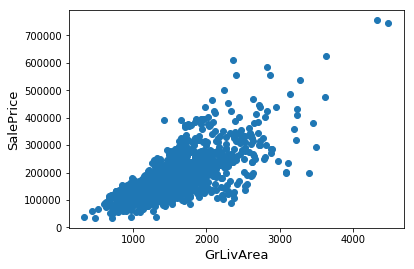

In [16]:
plt.scatter(x = train_fillna_df['GrLivArea'], y = train_fillna_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

&emsp;&emsp;Take a look at corr-heatplot

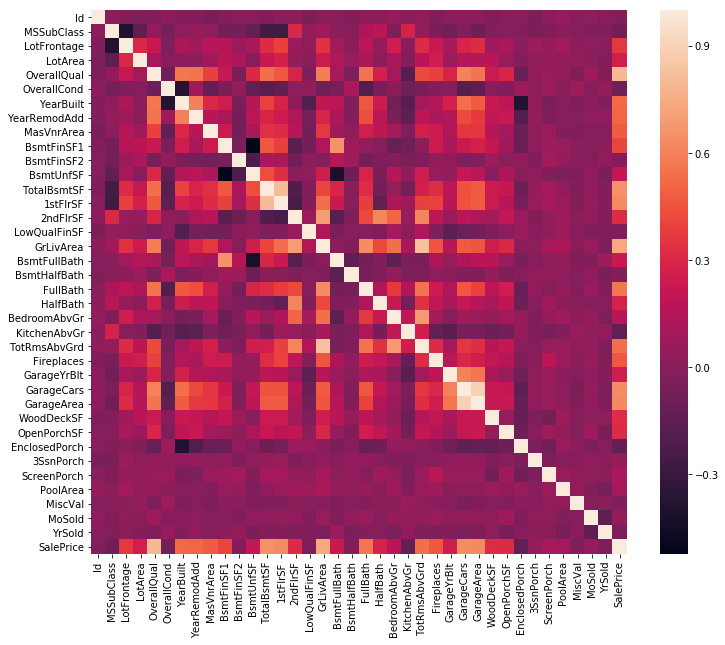

In [17]:
plt.subplots(figsize=(12,10))
corrmat = train_fillna_df.corr()
g = sns.heatmap(train_fillna_df.corr())

<font size=5>2. Feature Engining</font>

&emsp;&emsp;There are different types of values in the dataset. What I need to do is to divide all features into groups of category, label and just float or integer. 

&emsp;&emsp;And I also need to prepare the y_train.

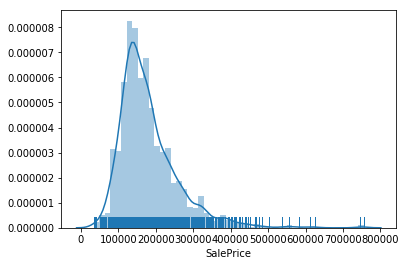

In [18]:
y_train = train_fillna_df['SalePrice']

sns.distplot(y_train,rug=True)

&emsp;&emsp;Unfortunately, it's right skewed. I have to make a log1p transform in order to make it more normally distributed.

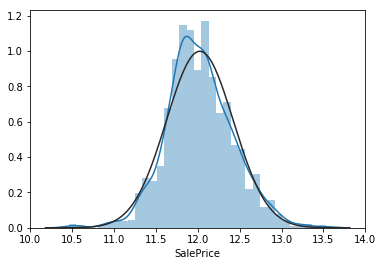

In [19]:
y_train = np.log1p(y_train)

sns.distplot(y_train,fit=norm);
(mu,sigma) = norm.fit(y_train)

&emsp;&emsp;OK! That's it!

&emsp;&emsp;Now I'll deal with the rest data.

In [20]:
ntrain = train_fillna_df.shape[0]
train_fillna_df = train_fillna_df[train_fillna_df.columns[:-1]]
print('There are {} rows and {} columns in train.'.format(train_fillna_df.shape[0],train_fillna_df.shape[1]))
print('There are {} rows and {} columns in test.'.format(test_fillna_df.shape[0],test_fillna_df.shape[1]))

full_data = pd.concat([train_fillna_df,test_fillna_df])
print('There are {} rows and {} columns in full_data.'.format(full_data.shape[0],full_data.shape[1]))

There are 1458 rows and 80 columns in train.
There are 1459 rows and 80 columns in test.
There are 2917 rows and 80 columns in full_data.


&emsp;&emsp;Let's see what kind of types we have now.

In [21]:
full_data.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

&emsp;&emsp;Now I need to make some new features because some original columns are not fit my predction or not enough.  And I want to make more labels.

&emsp;&emsp;Obviously, total space quit affects the price. I make two different features. One is the total housing area, the other is the indoor area consist of basement, 1st floor and 2nd floor.(if have). And whether your house is finished also affect the saleprice

In [22]:
#Obviously, total space quit affects the price
area_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','LowQualFinSF','PoolArea' ]
full_data["TotalArea"] = full_data[area_cols].sum(axis=1)
full_data["TotalAreaBsmt1st2nd"] = full_data['TotalBsmtSF']+full_data["1stFlrSF"]+full_data["2ndFlrSF"]
full_data['HouseStyleFin'] = full_data['HouseStyle'].map(lambda x: 0 if x in ['2.5Unf','1.5Unf'] else 1)

&emsp;&emsp;I find some features whose type is numeric but are actually label vatiables. So they need to be separated from other numeric variables.

In [23]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
lbl.fit(list(full_data['MSSubClass'].values))
full_data['MSSubClass'] = lbl.transform(list(full_data['MSSubClass'].values))

full_data['GarageYrBlt']=full_data['GarageYrBlt'].astype(int)

intTostr = ['OverallQual','OverallCond','GarageYrBlt','MoSold','YrSold','YearBuilt','YearRemodAdd']
for c in intTostr:
    full_data[c] = full_data[c].astype(str)

num_list = full_data.dtypes[full_data.dtypes != 'object'].index.drop('Id')

for c in intTostr:
    full_data[c] = full_data[c].astype(int)

&emsp;&emsp;And [*Human Analog's Xgboost+Lasso*][1] helps me a lot in feature struction. I also benefit so much from his Simplifications of existing features into bad/average/good.
[1]:https://www.kaggle.com/humananalog/xgboost-lasso

&emsp;&emsp;First, I make some labels that shows whether the house has basic facilities.

In [24]:
full_data['HasFirePlace'] = (full_data['FireplaceQu'] != 'None')*1
full_data['HasGarage'] = (full_data['GarageType'] != 'None')*1
full_data['HasPool'] = (full_data['PoolQC'] != 'None')*1
full_data['HasFence'] = (full_data['Fence'] != 'None')*1
full_data['HasBasement'] = (full_data['BsmtQual'] != 'None')*1
full_data["Has2ndFloor"] = (full_data["2ndFlrSF"] != 0)*1
full_data["HasMasVnr"] = (full_data["MasVnrArea"] != 0)*1
full_data["HasWoodDeck"] = (full_data["WoodDeckSF"] != 0)*1
full_data["HasOpenPorch"] = (full_data["OpenPorchSF"] != 0)*1
full_data["HasEnclosedPorch"] = (full_data["EnclosedPorch"] != 0)*1
full_data["Has3SsnPorch"] = (full_data["3SsnPorch"] != 0)*1
full_data["HasScreenPorch"] = (full_data["ScreenPorch"] != 0)*1

&emsp;&emsp;I noticed that if the house doesn't have second exterior, *Exterior1st* and *Exterior2nd* are the same. So are *Condition1* and *Condition2*.

In [25]:
full_data.loc[full_data['Exterior1st'] == full_data['Exterior2nd'],'Exterior2nd'] = 'None'
full_data.loc[full_data['Condition1'] == full_data['Condition2'],'Condition2'] = 'None'

&emsp;&emsp;We need to pay attention to the date variables. I have to make some transformation so that I can find useful information.

In [26]:
full_data['HasRemodeled'] = (full_data['YearRemodAdd'] != full_data['YearBuilt'])*1
full_data['RecentRemodeled'] = (full_data['YearRemodAdd'] == full_data['YrSold'])*1
full_data["VeryNewHouse"] = (full_data["YearBuilt"] == full_data["YrSold"])*1
full_data["Age"] = 2010 - full_data["YearBuilt"]
full_data["TimeSinceSold"] = 2010 - full_data["YrSold"]
full_data["SeasonSold"] = full_data["MoSold"].map(
    {12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3})
full_data["YearsSinceRemodel"] = full_data["YrSold"] - full_data["YearRemodAdd"]
full_data["HighSeason"] = full_data["MoSold"].map( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

&emsp;&emsp;And the saleprice also depends on where we live. So the neighbourhood is an important variable for our prediction as well. However the number of values of *Neighborhood* are quite big, so I group them with the help of median.

In [27]:
train_ori_df["SalePrice"].groupby(train_ori_df["Neighborhood"]).median().sort_values()

Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64

&emsp;&emsp;And I divide the interval by step of 5000. Then I apply it on my dataset.

In [28]:
neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
}
full_data['Neighborhood'] = full_data['Neighborhood'].map(neighborhood_map)

&emsp;&emsp;I need to struct some functions to help me transform some features.

In [29]:
def self_func_qual_lbl(value):
    if value == 'None':
        return 0
    lbl_val_dic = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
    return lbl_val_dic[value]

def self_func_expo_lbl(value):
    if value == 'None':
        return 0
    lbl_val_dic = {'Gd':4,'Av':3,'Mn':2,'No':1}
    return lbl_val_dic[value]

def self_func_fintype_lbl(value):
    if value == 'None':
        return 0
    lbl_val_dic = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}
    return lbl_val_dic[value]

def self_func_garfin_lbl(value):
    if value == 'None':
        return 0
    lbl_val_dic = {'Fin':3,'RFn':2,'Unf':1}
    return lbl_val_dic[value]

def self_func_fence_lbl(value):
    if value == 'None':
        return 0
    lbl_val_dic = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1}
    return lbl_val_dic[value]
                   
def self_func_pave_lbl(value):
    if value == 'None':
        return 0
    lbl_val_dic = {'Y':3,'P':2,'N':1}
    return lbl_val_dic[value]

In [30]:
# make label ==> quality
qual_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
             'GarageQual','GarageCond','PoolQC']
for c in qual_list:
    full_data[c] = full_data[c].map(self_func_qual_lbl)
    
#make label ==> Exposure
full_data['BsmtExposure'] = full_data['BsmtExposure'].map(self_func_expo_lbl)

#make label ==> FinType
fintype_list = ['BsmtFinType1','BsmtFinType2']
for c in fintype_list:
    full_data[c] = full_data[c].map(self_func_fintype_lbl)
    
#make label ==> GarFin
full_data['GarageFinish'] = full_data['GarageFinish'].map(self_func_garfin_lbl)

#make label ==> Fence
full_data['Fence'] = full_data['Fence'].map(self_func_fence_lbl)

#make label ==> Pavement
full_data['PavedDrive'] = full_data['PavedDrive'].map(self_func_pave_lbl)


In [31]:
full_data.YrSold = full_data.YrSold.astype(str)
full_data.MoSold = full_data.MoSold.astype(str)
full_data.MSSubClass = full_data.MSSubClass.astype(str)
full_data.HalfBath = full_data.HalfBath.astype(str)
full_data.BedroomAbvGr = full_data.BedroomAbvGr.astype(str)
full_data.GarageCars = full_data.GarageCars.astype(str)

&emsp;&emsp;Now I'll check the skewness. If skewness>0.75, it'll be Box-Cox transformed.

In [32]:
skew_list = full_data[num_list].skew()
bc_trans_list = skew_list[lambda x:x>0.75].index

from scipy.special import boxcox1p

for feat in bc_trans_list:
    full_data[feat] = boxcox1p(full_data[feat],0.15)

&emsp;&emsp;After dropping useless features, I make dummy variables.

In [33]:
del full_data['Id']
del full_data['Utilities']
del full_data['GarageYrBlt']
full_data = pd.get_dummies(full_data)

full_data.shape

(2917, 277)

<font size=5>**2. Feature Selection**</font>

In [34]:
train = full_data[:ntrain]
test = full_data[ntrain:]
print(train.shape)
print(test.shape)

(1458, 277)
(1459, 277)


In [35]:
import pickle
trainset = pd.concat([train,y_train],axis=1)
with open('nyhouse_train.pkl','wb') as f:
    pick = pickle.Pickler(f)
    pick.dump(trainset)
    pick.clear_memo()
    f.close()

In [36]:
stop.alal

NameError: name 'stop' is not defined

<font size=5>**3. Modeling**</font>

In [37]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [38]:
train = train.as_matrix().astype(float)
test = test.as_matrix().astype(float)
label = y_train.as_matrix().astype(float)

Xtrain,Xtest,ytrain,ytest = train_test_split(train,label,test_size=0.25,random_state=0)
print(Xtrain.shape)
print(Xtest.shape)

(1093, 277)
(365, 277)


In [39]:
basic_model_search_switch = False

def gridsearch_result(model,params):
    model_gscv = GridSearchCV(model,params,scoring='mean_squared_error',cv=5)
    model_gscv.fit(Xtrain,ytrain)
    y_pred = model_gscv.predict(Xtest)
    score = mean_squared_error(ytest,y_pred)
    rmse = np.sqrt(-model_gscv.best_score_)
    print('Best cv score: {}'.format(rmse))
    return model_gscv.best_params_,score

In [40]:
#linearRegression
if basic_model_search_switch:
    lr_params = {'fit_intercept':[True,False]}
    linear = LinearRegression(normalize=True, n_jobs=-1)
    lr_best_param,lr_score = gridsearch_result(linear,lr_params)
    
    print('Linear testing score: {}'.format(lr_score))
    print('With the best parameters:')
    print(lr_best_param)
    
'''
Best cv score: 0.1358356834302731
Linear testing score: 0.01390175776570855
With the best parameters:
{'fit_intercept': False}
'''

"\nBest cv score: 0.1358356834302731\nLinear testing score: 0.01390175776570855\nWith the best parameters:\n{'fit_intercept': False}\n"

In [41]:
#Ridge
if basic_model_search_switch:
    ridge_params = {'alpha':[0.01,0.02,0.05,1,10,1e2,1e5],
                   'fit_intercept':[True,False],
                   'tol':[0.001,0.002,0.005,0.01]}
    ridge = Ridge(normalize=True)
    ridge_best_param,ridge_score = gridsearch_result(ridge,ridge_params)
    
    print('Ridge testing score: {}'.format(ridge_score))
    print('With the best parameters:')
    print(ridge_best_param)
    
'''
Best cv score: 0.11813686593692828
Ridge testing score: 0.011326805960040704
With the best parameters:
{'alpha': 10, 'fit_intercept': False, 'tol': 0.001}
'''

"\nBest cv score: 0.11813686593692828\nRidge testing score: 0.011326805960040704\nWith the best parameters:\n{'alpha': 10, 'fit_intercept': False, 'tol': 0.001}\n"

In [42]:
#lasso
if basic_model_search_switch:
    lasso_params = {'alpha':[1e-4,1e-3,0.01,0.02,0.05,0.1,0.5],
                   'fit_intercept':[True,False],
                   'tol':[0.0001,0.0002,0.0005,0.001]}
    lasso = Lasso(normalize=True)
    lasso_best_param,lasso_score = gridsearch_result(lasso,lasso_params)
    
    print('Lasso testing score: {}'.format(lasso_score))
    print('With the best parameters:')
    print(lasso_best_param)
    
'''
Best cv score: 0.11975607444054717
Lasso testing score: 0.011063688590690676
With the best parameters:
{'alpha': 0.0001, 'fit_intercept': True, 'tol': 0.0002}
'''

"\nBest cv score: 0.11975607444054717\nLasso testing score: 0.011063688590690676\nWith the best parameters:\n{'alpha': 0.0001, 'fit_intercept': True, 'tol': 0.0002}\n"

In [43]:
#ENet
if basic_model_search_switch:
    enet_params = {'alpha':[1e-4,1e-3,0.01,0.02,0.05,0.1,0.5,1,10,1e2],
                   'l1_ratio':[0.1,0.2,0.5,0.7,0.9],
                   'fit_intercept':[True,False],
                   'tol':[0.0001,0.0002,0.0005,0.001]}
    enet = ElasticNet(normalize=True)
    enet_best_param,enet_score = gridsearch_result(enet,enet_params)
    
    print('ENet testing score: {}'.format(enet_score))
    print('With the best parameters:')
    print(enet_best_param)
    
'''
Best cv score: 0.11959437696180887
ENet testing score: 0.011120444318308883
With the best parameters:
{'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.9, 'tol': 0.001}
'''

"\nBest cv score: 0.11959437696180887\nENet testing score: 0.011120444318308883\nWith the best parameters:\n{'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.9, 'tol': 0.001}\n"

In [44]:
#GBRT
if basic_model_search_switch:
    gbrt_params = {'learning_rate':[1e-3,0.01,0.02,0.05,0.1],
                   'alpha':list(np.linspace(0.1,0.9,9))}
    gbrt = GradientBoostingRegressor(n_estimators=3000,max_depth=4, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,loss='huber',
                                     random_state=1)
    gbrt_best_param,gbrt_score = gridsearch_result(gbrt,gbrt_params)
    
    print('GBRT testing score: {}'.format(gbrt_score))
    print('With the best parameters:')
    print(gbrt_best_param)
#alpha = 0.9, learning_rate = 0.01

In [45]:
#Kernel Ridge Regression
if basic_model_search_switch:
    krr_params = {'alpha':[1e2,1e3,1e4,1e5],
                  'gamma':[0.001,0.002,0.005]}
    krr = KernelRidge(kernel='poly',degree=2,coef0=2.5)
    krr_best_param,krr_score = gridsearch_result(krr,krr_params)
    
    print('KRR testing score: {}'.format(krr_score))
    print('With the best parameters:')
    print(krr_best_param)    

'''
Best cv score: 0.11716151300196502
KRR testing score: 0.011324498073661326
With the best parameters:
{'alpha': 10000.0, 'gamma': 0.005}
'''

"\nBest cv score: 0.11716151300196502\nKRR testing score: 0.011324498073661326\nWith the best parameters:\n{'alpha': 10000.0, 'gamma': 0.005}\n"

In [46]:
if basic_model_search_switch:
    rf_params = {'n_estimators':[2500],'max_leaf_nodes':[10,50,100]}
    rf = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=1)
    rf_best_param, rf_score = gridsearch_result(rf,rf_params)

    print('RandomForest testing score: {}'.format(rf_score))
    print('With the best parameters')
    print(rf_best_param)

In [47]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, Xtrain, ytrain, scoring="mean_squared_error", cv = kf))
    return(rmse)

In [48]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                instance.fit(X[train_index], y[train_index])
                self.base_models_[i].append(instance)
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [49]:
#basic_model_search_switch = False
lasso = Lasso(alpha=0.0001, fit_intercept=True, tol=0.0002, normalize=True)
ENet = ElasticNet(alpha=0.0001, fit_intercept=True, l1_ratio=0.9, tol=0.001, normalize=True)
KRR = KernelRidge(kernel='poly',degree=2,coef0=2.5, alpha=10000.0, gamma=0.005)
GBRT = GradientBoostingRegressor(alpha=0.9, learning_rate=0.01,n_estimators=3000,
                                 max_depth=4, max_features='sqrt',min_samples_leaf=15, 
                                 min_samples_split=10,loss='huber',random_state=1)
rf = RandomForestRegressor(n_estimators=2000, max_depth=5, oob_score=True, n_jobs=-1, random_state=1)

In [50]:
if basic_model_search_switch:
    stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBRT, KRR, lasso),
                                                     meta_model = rf)

    score = rmsle_cv(stacked_averaged_models)
    print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [51]:
#xgboost
if not basic_model_search_switch:
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.46, gamma=0.0406, 
                                 learning_rate=0.05, max_depth=3, 
                                 min_child_weight=1, n_estimators=1000,
                                 reg_alpha=0.4640, reg_lambda=0.8573,
                                 subsample=0.52, silent=1,
                                 random_state =7, n_jobs = -1)
    
    cv_score = rmsle_cv(model_xgb)
    print('xgb cv score: {}'.format(cv_score.mean()))
    xgbr = model_xgb.fit(Xtrain,ytrain)
    y_pred_xgbr = model_xgb.predict(Xtest)
    test_score = mean_squared_error(ytest,y_pred_xgbr)
    print('XGB testing score: {}'.format(test_score))
'''
   colsample_bytree=0.46, gamma=0.0406, 
                                 learning_rate=0.05, max_depth=3, 
                                 min_child_weight=1, n_estimators=720,
                                 reg_alpha=0.4640, reg_lambda=0.8573,
                                 subsample=0.5213, silent=1,
                                 random_state =7, n_jobs = -1
''' 

xgb cv score: 0.12180353705970508
XGB testing score: 0.01168797825552045


'\n   colsample_bytree=0.46, gamma=0.0406, \n                                 learning_rate=0.05, max_depth=3, \n                                 min_child_weight=1, n_estimators=720,\n                                 reg_alpha=0.4640, reg_lambda=0.8573,\n                                 subsample=0.5213, silent=1,\n                                 random_state =7, n_jobs = -1\n'

In [52]:
#lightgbm
if not basic_model_search_switch:
    model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                                  learning_rate=0.05, n_estimators=720,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    score = rmsle_cv(model_lgb)
    print('lgb cv score: {}'.format(score.mean()))
    lgbr = model_lgb.fit(Xtrain,ytrain)
    y_pred_lgbr = model_lgb.predict(Xtest)
    test_score = mean_squared_error(ytest,y_pred_lgbr)
    print('LGB testing score: {}'.format(test_score))

lgb cv score: 0.12081457579940187
LGB testing score: 0.012465761316731898


In [53]:
if not basic_model_search_switch:
    stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBRT, KRR, lasso),
                                                         meta_model = rf)
    lasso_pred = lasso.fit(Xtrain,ytrain).predict(Xtest)
    enet_pred = ENet.fit(Xtrain,ytrain).predict(Xtest)
    stack_pred = stacked_averaged_models.fit(Xtrain,ytrain).predict(Xtest)

    input = np.column_stack([stack_pred,lasso_pred])
    for theta1 in [0.25,0.3,0.33,0.45,0.5,0.6,0.75,0.8,0.9]:
        theta3 = 1-theta1
        if theta3 >= 0:
            weights = np.array([theta1,theta3])

            result = np.dot(input,weights.T)
            score = mean_squared_error(result,ytest)
            print('With the weights:')
            print(weights)
            print(score)
            print('-'*30)

With the weights:
[ 0.25  0.75]
0.0104607496647
------------------------------
With the weights:
[ 0.3  0.7]
0.010377185465
------------------------------
With the weights:
[ 0.33  0.67]
0.0103329707189
------------------------------
With the weights:
[ 0.45  0.55]
0.010200540037
------------------------------
With the weights:
[ 0.5  0.5]
0.010166340618
------------------------------
With the weights:
[ 0.6  0.4]
0.0101349653655
------------------------------
With the weights:
[ 0.75  0.25]
0.0101804614506
------------------------------
With the weights:
[ 0.8  0.2]
0.0102203092026
------------------------------
With the weights:
[ 0.9  0.1]
0.0103370282922
------------------------------


In [54]:
def subtocsv():
    lasso_pred = lasso.fit(train,label).predict(test) 
    stack_pred = stacked_averaged_models.fit(train,label).predict(test)
    input = np.column_stack([stack_pred,lasso_pred])
    weights = np.array([0.25,0.75])
    result = np.dot(input,weights.T)
    y_test = np.expm1(result)
    sub=pd.DataFrame(y_test,index=test_ori_df['Id'],columns=['SalePrice'])
    sub.to_csv('substack.csv')
    print('Successfully Done!')
    

In [55]:
subtocsv()

Successfully Done!


In [56]:
def save_to_csv(model):
    y_pre=model.fit(train,label).predict(test)
    y_test=np.expm1(y_pre)
    sub=pd.DataFrame(y_test,index=test_ori_df['Id'],columns=['SalePrice'])
    sub.to_csv('substack.csv')
    print('Successfully Done!')